In [10]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:10000px;
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
input.good:checked + label {color: green}
input.bad:checked + label {color: red}
input.good:checked + label::after {color: green; content: ' Õige vastus!'}
input.bad:checked + label::after {color: red; content: ' Vale vastus!'}
</style>

# Näide: logistiline kujutus

Diskreetse süsteemi kõige olulisem näide on *logistiline kujutus*. See tööleht näitab selle kujtuse põhilisi omadusi. Arvutamiseks kasutame NumPy ja SymPy, joonistamiseks kasutame PyPlot.

In [17]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import multiprocessing as mp

## Kujutuse definitsioon

*Logistiline kujutus* on kujutus

$$\begin{array}{rcrcl}
f_r & : & [0,1] & \to & [0,1]\\
& & x & \mapsto & rx(1 - x)
\end{array}$$

faasiruumis $Q = [0,1]$, mis sõltub parameetrist $r \in [0,4]$.

Seega defineerime:

In [18]:
def logmap(r, x):
    return r * x * (1 - x)

Kujutuse omadusi näeme, kui me funktsiooni joonistame:

In [19]:
def mplot(r):
    XX = np.linspace(0.0, 1.0, 251)
    YY = [logmap(r, x) for x in XX]
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$f_r(x)$")
    ax.plot(XX, XX, 'r')
    ax.plot(XX, YY, 'b')
    ax.grid()
    plt.show()

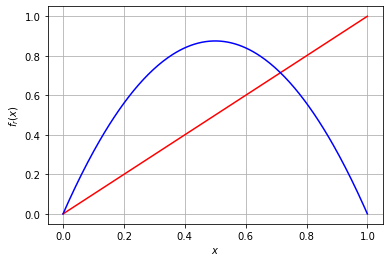

In [20]:
mplot(3.5)

Mõned huvitavad omadused on järgnevalt:

* Funktsioonil on antud vahemikus $Q = [0, 1]$ miinimumid $x = 0$ ja $x = 1$, kus kehtib $f_r(0) = f_r(1) = 0$.
* Funktsioonil on maksimum $x = \frac{1}{2}$, kus kehtib $f_r(\frac{1}{2}) = \frac{r}{4}$.
* Funktsioonil on püsipunkt $x_* = 0$, kuna $f_r(0) = 0$.
* Kui $r \geq 1$, siis on funktsioonil ka püsipunkt $x_* = 1 - \frac{1}{r}$.

## Itereeritud kujutus

Kuna meid huvitavad nii püsipunktid kui perioodilised trajektoorid, vaatame itereeritud (korduvalt rakendatud) funktsiooni

$$f_r^n(x) = \underbrace{(f_r \circ \ldots \circ f_r)}_{n \text{ korda}}(x).$$

Seega defineerime:

In [21]:
def nlogmap(n, r, x):
    y = x
    for _ in range(n):
        y = logmap(r, y)
    return y

Lisaks joonistame ka $f_r^n$ erinevate $n$ väärtuste puhul.

In [22]:
def nplot(n, r):
    XX = np.linspace(0.0, 1.0, n * 250 + 1)
    YY = [nlogmap(n, r, x) for x in XX]
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$f_r^%d(x)$" % n)
    ax.plot(XX, XX, 'r')
    ax.plot(XX, YY, 'b')
    ax.grid()
    plt.show()

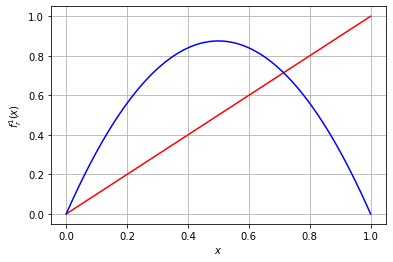

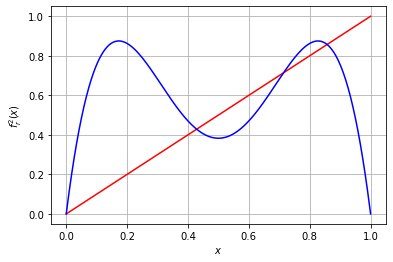

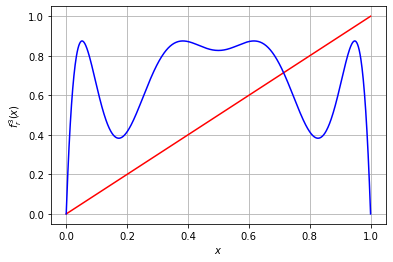

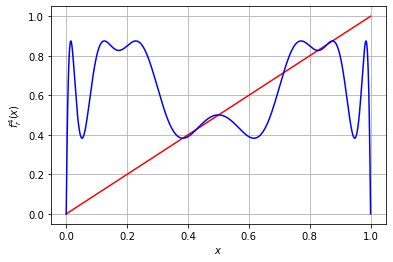

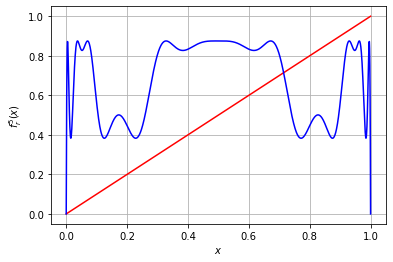

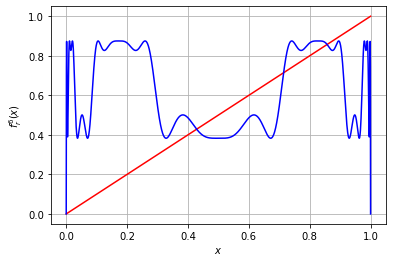

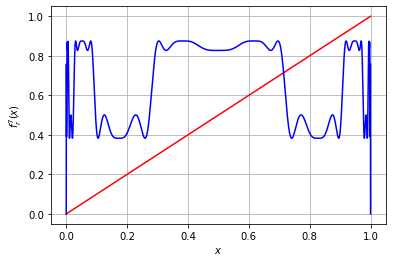

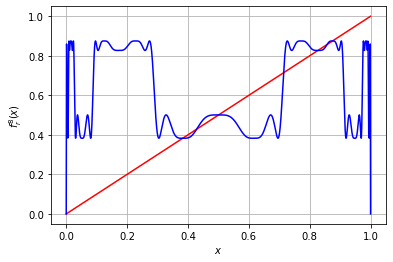

In [9]:
for n in range(1, 9):
    nplot(n, 3.5)

Joonis näitab ka lõikepunkt, kus kehtib $f_r^n(x) = x$. Sellest järeldub, et vastavad $x$ väärtused on perioodilise trajektoori liikmed, mille periood $m$ jagab $n$, see tähendab $n/m \in \mathbb{N}$. Näiteks:

* Esimene joonis $f_r^1$ näitab püsipunkte $x = 0$ ja (juhul kui $r > 1$) $x = 1 - \frac{1}{r}$.
* Kui $r > 3$, siis näitab teine joonis $f_r^2$ lisaks ka perioodilist trajektoori
$$x = \frac{r + 1 \pm \sqrt{(r - 3)(r + 1)}}{2r},$$
mille periood on 2.

## Trajektoorid

Ühemõõtmelise süsteemi trajektoori saab leida ka graafiliselt järgmise protseduuri abil:

1. Joonista funktsioone <span style="color:blue">$x \mapsto f_r(x)$</span> ja <span style="color:red">$x \mapsto x$.</span>
2. Vali algtingimust $x_0$.
3. Mine punktile <span style="color:red">$(x_n, x_n)$</span>, kus $n = 0$.
4. Liigu vertikaalselt punktile <span style="color:blue">$(x_n, x_{n + 1}) = (x_n, f_r(x_n))$</span>.
5. Liigu horitsontaalselt punktile <span style="color:red">$(x_{n + 1}, x_{n + 1})$</span>.
6. Asenda $n \mapsto n + 1$ ja jätka sammuga 4.

Alljärgnev funktsioon kasutab seda protseduuri.

In [23]:
def iplot(n, r, x0):
    pts = [(x0, x0)]
    x = x0
    for _ in range(n):
        y = logmap(r, x)
        pts.append((x, y))
        pts.append((y, y))
        x = y
    XY = np.array(pts)
    XX = np.linspace(0.0, 1.0, 251)
    YY = [logmap(r, x) for x in XX]
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$f_r(x)$")
    ax.plot(XX, XX, 'r')
    ax.plot(XX, YY, 'b')
    ax.plot(XY[:, 0], XY[:, 1], 'k')
    ax.grid()
    plt.show()

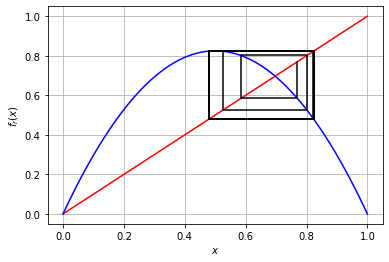

In [24]:
iplot(100, 3.3, 0.77)

Sõltuvalt parameetri $r$ väärtusest näeme, et trajektoorid koonduvad püsipunktile või perioodilisele trajektoorile, või on kaootilised.

## Feigenbaumi diagramm ja üleminek kaosesse

Selleks et paremini näha, kuidas trajektooride pikaajaline käitumine sõltub parameetri $r$ väärtusest, on mõistlik joonistada *Feigenbaumi diagrammi*. Diagrammi horitsontaalsel teljel on parameeter $r$, vertikaalsel teljel on suvaliselt valitud algtingimusele $x_0$ vastava trajektoori liikmed $x_{n_1}, \ldots, x_{n_2}$. Feigenbaumi diagramm kasutab logistilise kujutuse omadust, et trajektooride pikaajaline kvalitatiivne käitumine (see tähendab, kui $n_1$ on valitud piisavalt suureks) ei sõltu algtingimusest.

In [33]:
class feigit:
    def __init__(self, x0, pre, it):
        self.x0 = x0
        self.pre = pre
        self.it = it

    def __call__(self, r):
        pts = []
        x = self.x0
        for _ in range(self.pre):
            x = logmap(r, x)
        for _ in range(self.it):
            x = logmap(r, x)
            pts.append((r, x))
        return pts
        
def fplot(r1, r2, nr, x0, pre, it):
    RR = np.linspace(r1, r2, nr)
    fi = feigit(x0, pre, it)
    
    with mp.Pool() as pool:
        XY = np.array(pool.map(fi, RR)).reshape(nr * it, 2)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel("r")
    ax.set_ylabel("x")
    ax.scatter(XY[:, 0], XY[:, 1], marker=".", s=1, lw=0)
    ax.grid()
    plt.show()

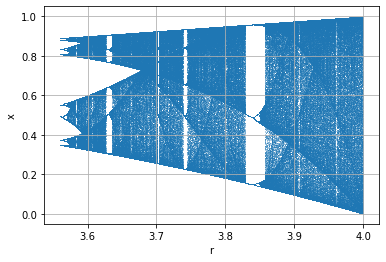

In [34]:
fplot(3.56, 4, 1000, 0.27, 500, 500)

Joonis näitab sellist käitumist:

* Kui $0 < r < 1$, siis on stabiilne püsipunkt $x_* = 0$, kuna $f_r(0) = 0$ ja
$$-1 < f_r'(0) = r < 1.$$

* Kui $r = b_0 = 1$, muutub püsipunkt $x_* = 0$ ebastabiilseks. Selle asemel muutub püsipunkt $x_* = 1 - \frac{1}{r}$ stabiilseks, kuna
$$-1 < f_r'\left(1 - \frac{1}{r}\right) = 2 - r < 1,$$
kui $1 < r < 3$.

* Kui $r = b_1 = 3$, muutub ka püsipunkt $x_* = 1 - \frac{1}{r}$ ebastabiilseks. Selle asemel ilmub stabiilne perioodiline trajektoor, mille periood on 2, ja mida me leiame, kui me lahendame $f_r^2(x_{\#}) = x_{\#}$:
$$x_{\#}^{\pm} = \frac{r + 1 \pm \sqrt{(r - 3)(r + 1)}}{2r}.$$
Tema stabiilsust näitab tuletis
$$(f_r^2)'(x_{\#}^{\pm}) = f'(x_{\#}^+)f'(x_{\#}^-) = -r^2 + 2r + 4,$$
millest järeldub, et see perioodiline trajektoor on stabiilne kui $3 < r < 1 + \sqrt{6}$.

* Kui $r = b_2 = 1 + \sqrt{6}$, muutub ka kahest punktist koosnev perioodiline trajektoor ebastabiilseks, ja selle asemel ilmub neljast punktist koosnev trajektoor, mis on stabiilne kuni parameetri väärtuseni $r = b_3$, kus ta muutub ebastabiilseks. Siis ilmub kaheksast punktist koosnev trajektoor, jne. Vahemikud $(b_n, b_{n + 1})$, milles on perioodiga $2^n$ trajektoor stabiilne, saavad järjest väiksemaks. Jada $(b_n)$ koondub *Feigenbaumi punktile*
$$b_{\infty} = \lim_{n \to \infty}b_n \approx 3.5699456718709\ldots$$
Vahemikute pikkuste suhted koonduvad *Feigenbaumi konstandile*
$$\delta = \lim_{n \to \infty}\delta^b_n = \lim_{n \to \infty}\frac{b_{n - 1} - b_{n - 2}}{b_n - b_{n - 1}} \approx 4.66920160910299067\ldots$$

* Feigenbaumi punktis $r = b_{\infty}$ muutuvad perioodilised trajektoorid ebastabiilseks, ja süsteemi käitumine muutub *kaootiliseks*. Kaootilises parameetri vahemikus on ka *perioodilised aknad*, kus süsteem käitub jälle perioodiliselt.

## Lyapunovi eksponent ja stabiilsus

Trajektoorite stabiilsust näitab ka *Lyapunovi eksponent*

$$\lambda_r(x) = \lim_{n \to \infty}\frac{1}{n}\sum_{k = 0}^{n - 1}\ln\left|f_r'\left(f_r^k(x)\right)\right|.$$

Selle arvutamiseks on meil vaja logistilise kujutuse tuletist

$$f_r'(x) = \frac{d}{dx}f_r(x) = r(1 - 2x).$$

Seega defineerime:

In [35]:
def dlogmap(r, x):
    return r * (1 - 2 * x)

Järgmisena arvutame Lyapunovi eksponenti. Selleks kasutame omadust, et avaldis

$$\frac{1}{n_2 - n_1}\sum_{k = n_1 + 1}^{n_2}\ln\left|f_r'\left(f_r^k(x)\right)\right|$$

koondub Lyapunovi eksponendile, kui $n_1, n_2$ on piisavalt suured. Seega sobib selline protseduur:

* Vali algingimust $x_0$.
* Rakenda $n_1$ korda funktsiooni $f_r$, et saada $x_{n_1}$.
* Rakenda veel $n_2 - n_1$ korda funktsiooni $f_r$, ja igal sammul $k$ liida summale liiget $\ln\left|f_r'\left(x_k\right)\right|$.
* Jaga summa $(n_2 - n_1)$-ga.

Alljärgnev funktsioon rakendab seda protseduuri:

In [37]:
class lyapit:
    def __init__(self, x0, pre, it):
        self.x0 = x0
        self.pre = pre
        self.it = it

    def __call__(self, r):
        ly = 0
        x = self.x0
        for _ in range(self.pre):
            x = logmap(r, x)
        for _ in range(self.it):
            x = logmap(r, x)
            ly += np.log(np.fabs(dlogmap(r, x)))
        return ly / self.it

Lõpuks joonistame Lyapunovi eksponenti sõltuvalt parameetrist $r$. Paneme tähele, et Lyapunovi eksponent sõltub ainult trajektoori pikaajalisest käitumisest, ja seega mitte algtingimusest.

In [38]:
def lplot(r1, r2, nr, x0, pre, it):
    RR = np.linspace(r1, r2, nr)
    li = lyapit(x0, pre, it)
    
    with mp.Pool() as pool:
        LL = pool.map(li, RR)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel(r"$r$")
    ax.set_ylabel(r"$\lambda(r)$")
    ax.plot(RR, LL, 'b')
    ax.grid()
    plt.show()

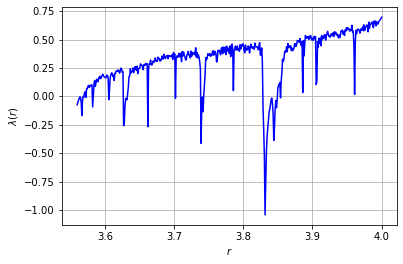

In [39]:
lplot(3.56, 4, 453, 0.27, 100, 250)

Joonis näitab:

* Üliatraktiivsetes punktides $r = s_n$ on $\lambda_r(x) = -\infty$, mis järeldub sellest, et $\left(f_{s_n}^{2^{n - 1}}\right)'(x) = 0$, kui $x$ kuulub atraktorile. Sel juhul koonduvad trajektoorid kõige kiiremalt.

* Bifurkatsioonipunktides $r = b_n$ on $\lambda_r(x) = 0$, sest $\left|\left(f_{b_n}^{2^{n - 1}}\right)'(x)\right| = 1$, kui $x$ kuulub atraktorile. Sel juhul koonduvad trajektoorid kõige aeglasemalt.

* Kui süsteem käitub kaootiliselt, on Lyapunovi eksponent positiivne. Lähedaste trajektooride kaugus kasvab eksponentsiaalselt.

* Kui süsteem käitub perioodiliselt, on Lyapunovi eksponent negatiivne. Lähedaste trajektooride kaugus langeb eksponentsiaalselt.

## Feigenbaumi konstant

Lõpuks arvutame Feigenbaumi punkti

$$b_{\infty} = s_{\infty} = \lim_{n \to \infty}b_n = \lim_{n \to \infty}s_n \approx 3.5699456718709\ldots,$$

kus toimub üleminek kaosesse, ja Feigenbaumi konstanti

$$\delta = \lim_{n \to \infty}\frac{b_{n - 1} - b_{n - 2}}{b_n - b_{n - 1}} = \lim_{n \to \infty}\frac{s_{n - 1} - s_{n - 2}}{s_n - s_{n - 1}} \approx 4.66920160910299067\ldots$$

Kuna trajektoorid koonduvad kiiremini üliatraktiivsetes punktides, on lihtsam neid numbriliselt arvutada. Alljärgnev programm kasutab selleks Newtoni meetodi.

In [28]:
# mitu numbrikohta kasutada arvutuses
prec = 50
# üliatraktiivse punkti täpsus
diff = 1e-40
# mitu $s_n$ ja $\delta_n$ arvutada
kmax = 20

# $s_1 = 2$
r1 = sp.N(2, prec)
# $s_2 = 1 + \sqrt{5}$
r2 = sp.N(1 + sp.sqrt(5), prec)
# $c = \frac{1}{4}$
c4 = sp.N(1/4, prec)
# $\delta \approx 4.7$
delta = sp.N(47/10, prec)
# trajektoori periood, millest arvutus algab
n = 2

for k in range(3, kmax + 1):
    # järgmine $s_n$ peaks umbes siin olema
    r = r2 + (r2 - r1) / delta
    # vastava trajektoori periood on kaks kord suurem
    n *= 2
    # koondumist mõõdame võrreldes eelmise sammu tulemusega
    r0 = r2

    # kasutame Newtoni meetodi
    while abs(r - r0) > diff:
        # eelmise Newtoni sammu tulemus
        r0 = r

        # stardipunkt on $g_0(r) = 0$
        g = 0
        # lisaks paneme $g_0'(r) = 0$
        dg = 0

        # arvutame $g_n(r)$ ja $g_n'(r)$
        for _ in range(n):
            # $g_{i + 1}'(r) = \frac{1}{4} - g_i(r)[g_i(r) + 2rg_i'(r)]$
            dg = c4 - g * (g + 2 * r * dg)
            # $g_{i + 1}(r) = \frac{r - 2}{4} - r[g_i(r)]^2$
            g = (r - 2) / 4 - r * g * g

        # nüüd on $g' = g_n'(r)$ ja $g = g_n(r)$, ja me saame järgmist sammu
        r -= g / dg

    # arvutame $\delta_k$
    delta = (r2 - r1) / (r - r2)
    r1 = r2
    r2 = r

    # praeguse sammu tulemus
    print("s[%2d] = " % k, r, ", d[%2d] = " % k, delta)

s[ 3] =  3.4985616993277015199989453819445392678868790365444 , d[ 3] =  4.7089430135405033131765483177494058848993771369340
s[ 4] =  3.5546408627688248653660818519484917918272000141143 , d[ 4] =  4.6807709980106953816308506527760775105040902516792
s[ 5] =  3.5666673798562685139726311574553680919379540660014 , d[ 5] =  4.6629596111141025840102402120246233524704006984846
s[ 6] =  3.5692435316371103378082495109127455581766294410483 , d[ 6] =  4.6684039259184002378217397631680348971718884183023
s[ 7] =  3.5697952937499446205153525296069779756774591767650 , d[ 7] =  4.6689537409676227810022570133666403852413817932026
s[ 8] =  3.5699134654223485148409735196680118263186321889074 , d[ 8] =  4.6691571813288434823178489841538326584176522982456
s[ 9] =  3.5699387742333054877934460675629869263611501462433 , d[ 9] =  4.6691910024850961508886384643570191225472609011531
s[10] =  3.5699441946080649332436333438721733364700967976087 , d[10] =  4.6691994705477257746860463581920147713321369990842
s[11] = 

On näha, et jadad koonduvad.